In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")

### Review of lecture 23

We learned a bit about matrix math

#### In this lecture we will:

- Learn how to plot great and small circles on an equal area net and map projections. 




### Plotting a great circle

In Lecture 22 we learned how to plot directions on equal area and equal angle plots.  Then in Lecture 23 we learned how to calculate the angles between two vectors (with the dot product) and the pole to a plane containing to vectors (with the cross product).  

Now we want to plot the trace of the plane on our equal area net (and it better go through the two points!).    

So...   Recall below from Lecture 22 - but notice that I put the two functions, EqualArea and EqualAngle into a module called **nets** now. 

Here is the plot so far.  I also plotted the pole to the plane that we calculated last time as a green triangle.

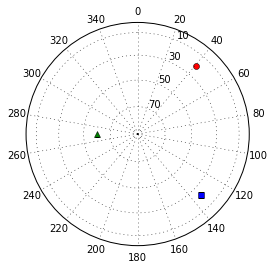

In [2]:
import nets as nets # load up the net module
Azs=np.array([40.9,134.1,270.]) # make an array of azimuths
Pls=np.array([20.7,22.5,60.]) # same for plunges
Azs=np.radians(Azs) # convert the azimuths to plunges


fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid


# nets.EqualArea() converts the plunges to plot coordinates
plt.polar(Azs[0],nets.EqualArea(Pls)[0],'ro') # put on the azimuths and plunges
plt.polar(Azs[1],nets.EqualArea(Pls)[1],'bs') # second one as a blue square
plt.polar(Azs[2],nets.EqualArea(Pls)[2],'g^') # third one as a green triangle
# put on the azimuth lines
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
# make the plunge circles and labels
list1=[nets.EqualArea(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2);



Now that we re-created our net with the two directions and the pole to the plane that contained both, we  want to plot the trace of the plane onto the net. Because we might want to call this again, let's make a function to do it.  Basically what we want is a whole bunch of points in the plane that trace out the plane in net coordinates.  

This function **pts_on_a_plane( )** will do the trick (and in fact with also do small circles, too). 

In [3]:
# set up rotation matrix
def pts_on_a_plane(pole,gamma):
    """
    Calculates directions gamma angle away from a pole.
    
    Inputs: 
    pole: array of azimuth and plunge of the pole
    gamma: desired angle away from the pole
    
    Returns: 
    PTS:  the points on the plane
    """
    
    gamma=np.radians(gamma) # convert gamma to radians
    t=np.zeros((3,3)) # set up a rotation matrix, initialized with zeros.
    t[2]=nets.dir2cart(pole) # assigns the cartesian coordinates of pole to t[2]
    plane1=[pole[0],pole[1]-90.] #  one vector orthogonal to the pole, in the plane
    plane2=[pole[0]+90.,0] # a vector orthogonal to both the pole and plane1
    t[0]=nets.dir2cart(plane1) # assigns this vector's cartesian coordinates to t[0]
    t[1]=nets.dir2cart(plane2)# assigns this vector's cartesian coordinates to t[1]
    t=t.transpose() # takes the transpose
# set up v
    npts=201 # number of points we want in the plane
    xnum=float(npts-1.)/2.
    v=[0,0,0]
    PTS=[] # make a list to keep the data points
    for i in range(npts):  # incremental point along plane
            psi=float(i)*np.pi/xnum
            v[0]=np.sin(gamma)*np.cos(psi)
            v[1]=np.sin(gamma)*np.sin(psi)
            if gamma==np.pi/2.:
                v[2]=0.
            else:
                v[2]=np.sqrt(1.-v[0]**2 - v[1]**2)
            elli=[0,0,0]
# calculate points on the ellipse
            for j in range(3):
                for k in range(3):
                    elli[j]=elli[j] + t[j][k]*v[k]  # cartesian coordinate j of ellipse
            PTS.append(nets.cart2dir(elli))
    return PTS


Now down to "bidness".  We want to plot the points on our equal area projection 

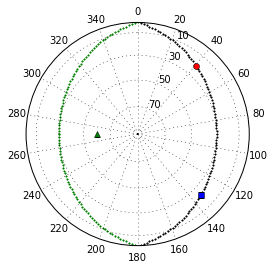

In [5]:
pole=[270.,60.] # direction of the pole (green triangle)
PTS=pts_on_a_plane(pole,90.) # get the points in the plane orthogonal to the pole
# same as it ever was
fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid

# now for the points on the plane
for pt in PTS: # step through the points
    if pt[1]<0: # make yellow dots in the upper hemisphere
        plt.polar(np.radians(pt[0]),nets.EqualArea(-pt[1]),'g.',markersize=3)
    else: # make black dots in the lower hemisphere. 
        plt.polar(np.radians(pt[0]),nets.EqualArea(pt[1]),'k.',markersize=3)
        
# put back on the old stuff
plt.polar(Azs[0],nets.EqualArea(Pls)[0],'ro')
plt.polar(Azs[1],nets.EqualArea(Pls)[1],'bs')
plt.polar(Azs[2],nets.EqualArea(Pls)[2],'g^')
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
list1=[nets.EqualArea(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2)
plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)]);


Whew!  The great circle representing the trace of the plane containing the glacial striations went right through the points representing the striation directions (as it must!).  



### Practice with great circles
- Someone measured the strike and dip of a plane to be 333 and 42$^{\circ}$ NE.   
- Calculate the dip and dip direction and the pole to the plane from the strike and dip.  
- Plot the trace of the plane on an equal area net.   

[Hint: look at Lecture 23 for how strike and dip works.]

Now that we can draw great (and small) circles on projections, it is interesting to compare distortions in various 2D projections of 3D information.  Let's start by comparing the equal area versus equal angle projections.  We can draw a direction with a circle of confidence around it on both projections to see how each behaves.  Starting with the equal area projection, let's draw a few directions with 15$^{\circ}$ circles of 95% confidence ($\alpha_{95}$). 

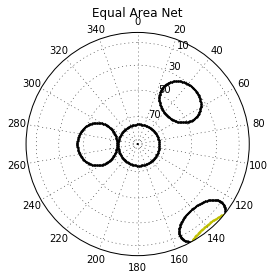

In [6]:
poles=[[270.,60.],[45,45],[135,89],[140,10]] #poles
a95=15. # circle of confidence
# old stuff
fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid
for pole in poles: # step through the list of poles
    PTS=pts_on_a_plane(pole,a95) # get the points a95 away from this pole
    for pt in PTS:
        if pt[1]<0:
            plt.polar(np.radians(pt[0]),nets.EqualArea(-pt[1]),'y.',markersize=3)
        else:
            plt.polar(np.radians(pt[0]),nets.EqualArea(pt[1]),'k.',markersize=3)
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
list1=[nets.EqualArea(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2)
plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
plt.title('Equal Area Net');



And the same for the equal angle plot:

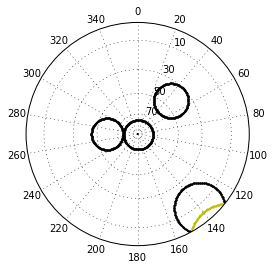

In [7]:
poles=[[270.,60.],[45,45],[135,89],[140,10]]
a95=15.
fig = plt.subplot(111, polar=True) # Specify polar axes
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid
for pole in poles:
    PTS=pts_on_a_plane(pole,a95)
    for pt in PTS:
        if pt[1]<0:
            plt.polar(np.radians(pt[0]),nets.EqualAngle(-pt[1]),'y.',markersize=3)
        else:
            plt.polar(np.radians(pt[0]),nets.EqualAngle(pt[1]),'k.',markersize=3)
lines,labels=plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)])
list1=[nets.EqualAngle(x) for x in range(10,90,20)] ##don't include center or edge
list2=[str(x) for x in range(10,90,20)]
rlines,rlables=plt.rgrids(list1,list2)
plt.thetagrids(range(0,360,20),[str(x) for x in range(0,360,20)]);




### Practice with small circles
- Someone measured a bunch of geomagnetic directions with a mean of 42$^{\circ}$ and a circle of 95% confidence of 15$^{\circ}$.  
- Plot the mean direction as a solid red triangle
- Plot the circle of confidence as  a dashed blue line. 
- Calculate the antipode (the direction 180$^{\circ}$ away).
- Put this on your plot as an white triangle.   

Aha!  The equal angle plot plots actual  circles while the equal area plot plots ovals! But the circles in the equal angle plots are all different sizes while the areas of the ovals are the same size.  This just demonstrates the pros and cons of each type of plot.  

Now let's look at some of our map projections and how they perform with respect to distortions.  And yes, once you have the points on the circles, you can plot them on a map, too. 

Here's the mercator projection with a 15$^{\circ}$ circles drawn around San Diego and a around some point in Siberia.   Look at the lecture on maps if you have forgotten how to do this:

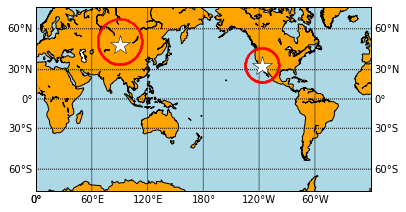

In [9]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.fillcontinents(color='orange')
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True])
m.drawmapboundary(fill_color='lightblue')
San_lat=33
San_lon=243
circ=15.
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20) # put San Diego on
PTS=pts_on_a_plane([San_lon,San_lat],circ) # get the points on the circle

for pt in PTS: # step through the points
    x,y=m(pt[0],pt[1]) # convert to map coordinates
    plt.plot(x,y,'r.',markersize=3) # plot as tiny red dots

# same for some point in Siberia
x,y=m(90,50)
plt.plot(x,y,'w*',markersize=20)
PTS=pts_on_a_plane([90,50],circ)
for pt in PTS:
    x,y=m(pt[0],pt[1])
    plt.plot(x,y,'r.',markersize=3)






Compare that with the distortion of a Hammer projection:

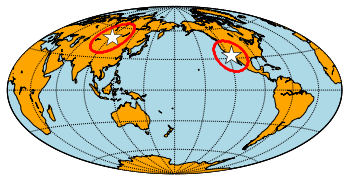

In [10]:
m = Basemap(projection='hammer',lon_0=180)
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='lightblue')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,30.))
m.drawmapboundary(fill_color='lightblue')
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20)
San_lat=33
San_lon=243
circ=15.
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20)
PTS=pts_on_a_plane([San_lon,San_lat],circ)
for pt in PTS:
    x,y=m(pt[0],pt[1])
    plt.plot(x,y,'r.',markersize=3)

x,y=m(90,50)
plt.plot(x,y,'w*',markersize=20)
PTS=pts_on_a_plane([90,50],circ)
for pt in PTS:
    x,y=m(pt[0],pt[1])
    plt.plot(x,y,'r.',markersize=3);



One squishes horizontally while the other squishes vertically. 

One more thing - recall the lecture when we looked at P and S wave arrivals and calculated the great circle distance between the source and receiver?  There was this map: 

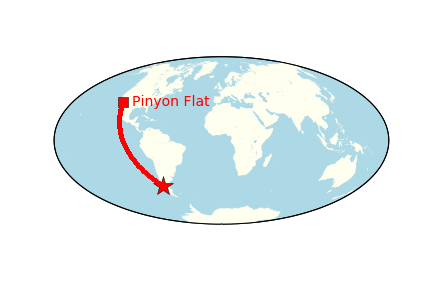

In [12]:
Image(filename='Figures/greatCirc.png')

Now  you can make this map yourself putting together tricks from finding the pole to two vectors, finding the great circle using spherical trigonometry and plotting the line on a Hammer projection.  

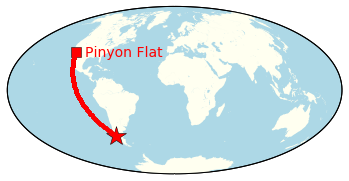

In [14]:
def find_pole(pt1,pt2):
    vec1=nets.dir2cart(pt1)
    vec2=nets.dir2cart(pt2)
    pole=np.cross(vec1,vec2)
    return nets.cart2dir(pole)
def great_circle(lat_1,lon_1,lat_2,lon_2):
    """
    find great circle distance between two points
    """
    # first we have to convert the latitudes to colatitudes:
    colat_1,colat_2=90.-lat_1,90.-lat_2
    # and alpha is the difference betwee the two longitudes
    alpha=(lon_2-lon_1)%360
    # Then lets make life easy on us and convert degrees to radians
    colat_1,colat_2,alpha= np.radians(colat_1),\
              np.radians(colat_2),np.radians(alpha)# continued line from above
    a=np.arccos(np.cos(colat_1)*np.cos(colat_2)+np.sin(colat_1)*np.sin(colat_2)*np.cos(alpha))
    # remember to convert back to degrees! 
    return np.degrees(a)  
#plt.figure(1,(10,5)) # make a nice big plot
PF_lat,PF_lon=33.3,-115.7
EQ_lat,EQ_lon=-43.42,-73.95
lons=[EQ_lon,PF_lon]
lats=[EQ_lat,PF_lat]
m = Basemap(projection='hammer',lon_0=0,resolution='l')
#m.drawcoastlines()
m.fillcontinents(color='ivory',lake_color='lightblue')
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,120.,30.))
#m.drawmeridians(np.arange(0.,420.,30.))
m.drawmapboundary(fill_color='lightblue')
x,y=m(EQ_lon,EQ_lat)
plt.plot([x],[y],'r*',markersize=20)

cities={'Pinyon Flat':[PF_lon,PF_lat]}
for city in cities.keys():
    Delta=great_circle(EQ_lat,EQ_lon,cities[city][1],cities[city][0]) # distance in degrees
    pole= find_pole([EQ_lon,EQ_lat],[cities[city][0],cities[city][1]])
    x,y=m(cities[city][0],cities[city][1])
    plt.plot(x,y,'rs',markersize=10)
    plt.text(x,y,"  "+city,color='red',ha='left',va='center',fontsize=14)
    pts=pts_on_a_plane(pole,90.)
    newx,newy=[],[]
    deltbak=Delta
    pts.reverse()# start from back
    for pt in pts[50:-1]: 
        delt=great_circle(EQ_lat,EQ_lon,pt[1],pt[0])
        if delt<deltbak:
            x,y=m(pt[0],pt[1]) # project onto map
            newx.append(x)
            newy.append(y)
            deltbak=delt
        plt.plot(newx,newy,'r.') 

### Assignment #8
- Speaking of the Christmas Day, 2016 earthquake,  there are seismic records from several different recording stations, besides the one that we looked at in Lecture 9 in  the Datasets/seismicRecords/  folder in this directory.
- The datafiles are as they were downloaded from the IRIS data website at http://ds.iris.edu/wilber3/find_stations/9948944. The seismic data are in the .txt files. 
- The datafile names have HOPE, PAYG, PMSA and SJG in them.  These are the station names and their locations are in the data files that start with SACPZ and end with .BHZ 
- Plot up the all earthquakes and find the great circle distances using the S-P delay time technique you learned in Lecture 13. The data start (about) one minute before the P wave arrival and stop (about) 1 minute after the S wave arrivals.  
- Using the great circle distances (in degrees) that you just calculated, plot around each seismic station location the distance (in degrees) as a small circle.  They  should intersect at the location of the earthquake in Chile. 

